In [1]:
#!pip install yellowbrick
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

## Multiple Linear Regression on the Auto data-set

In [2]:
df= pd.read_excel('C:/Users/I068117/UT_Machine Learning/Regression/Linear Regression/Auto.xlsx')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### Data Cleaning: Checking for null values & datatypes. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


Interpretation: We observe that column horsepower is an object. We look at the non-numeric rows and delete them from the data-set to clean the data

In [4]:
df= df.drop(df[pd.to_numeric(df['horsepower'],errors='coerce').isnull()].index, axis=0)
df['horsepower']=pd.to_numeric(df['horsepower'])
df.drop('name',axis=1,inplace=True)

### Data Visualization:  scatterplot matrix that includes all of the variables in the data set.

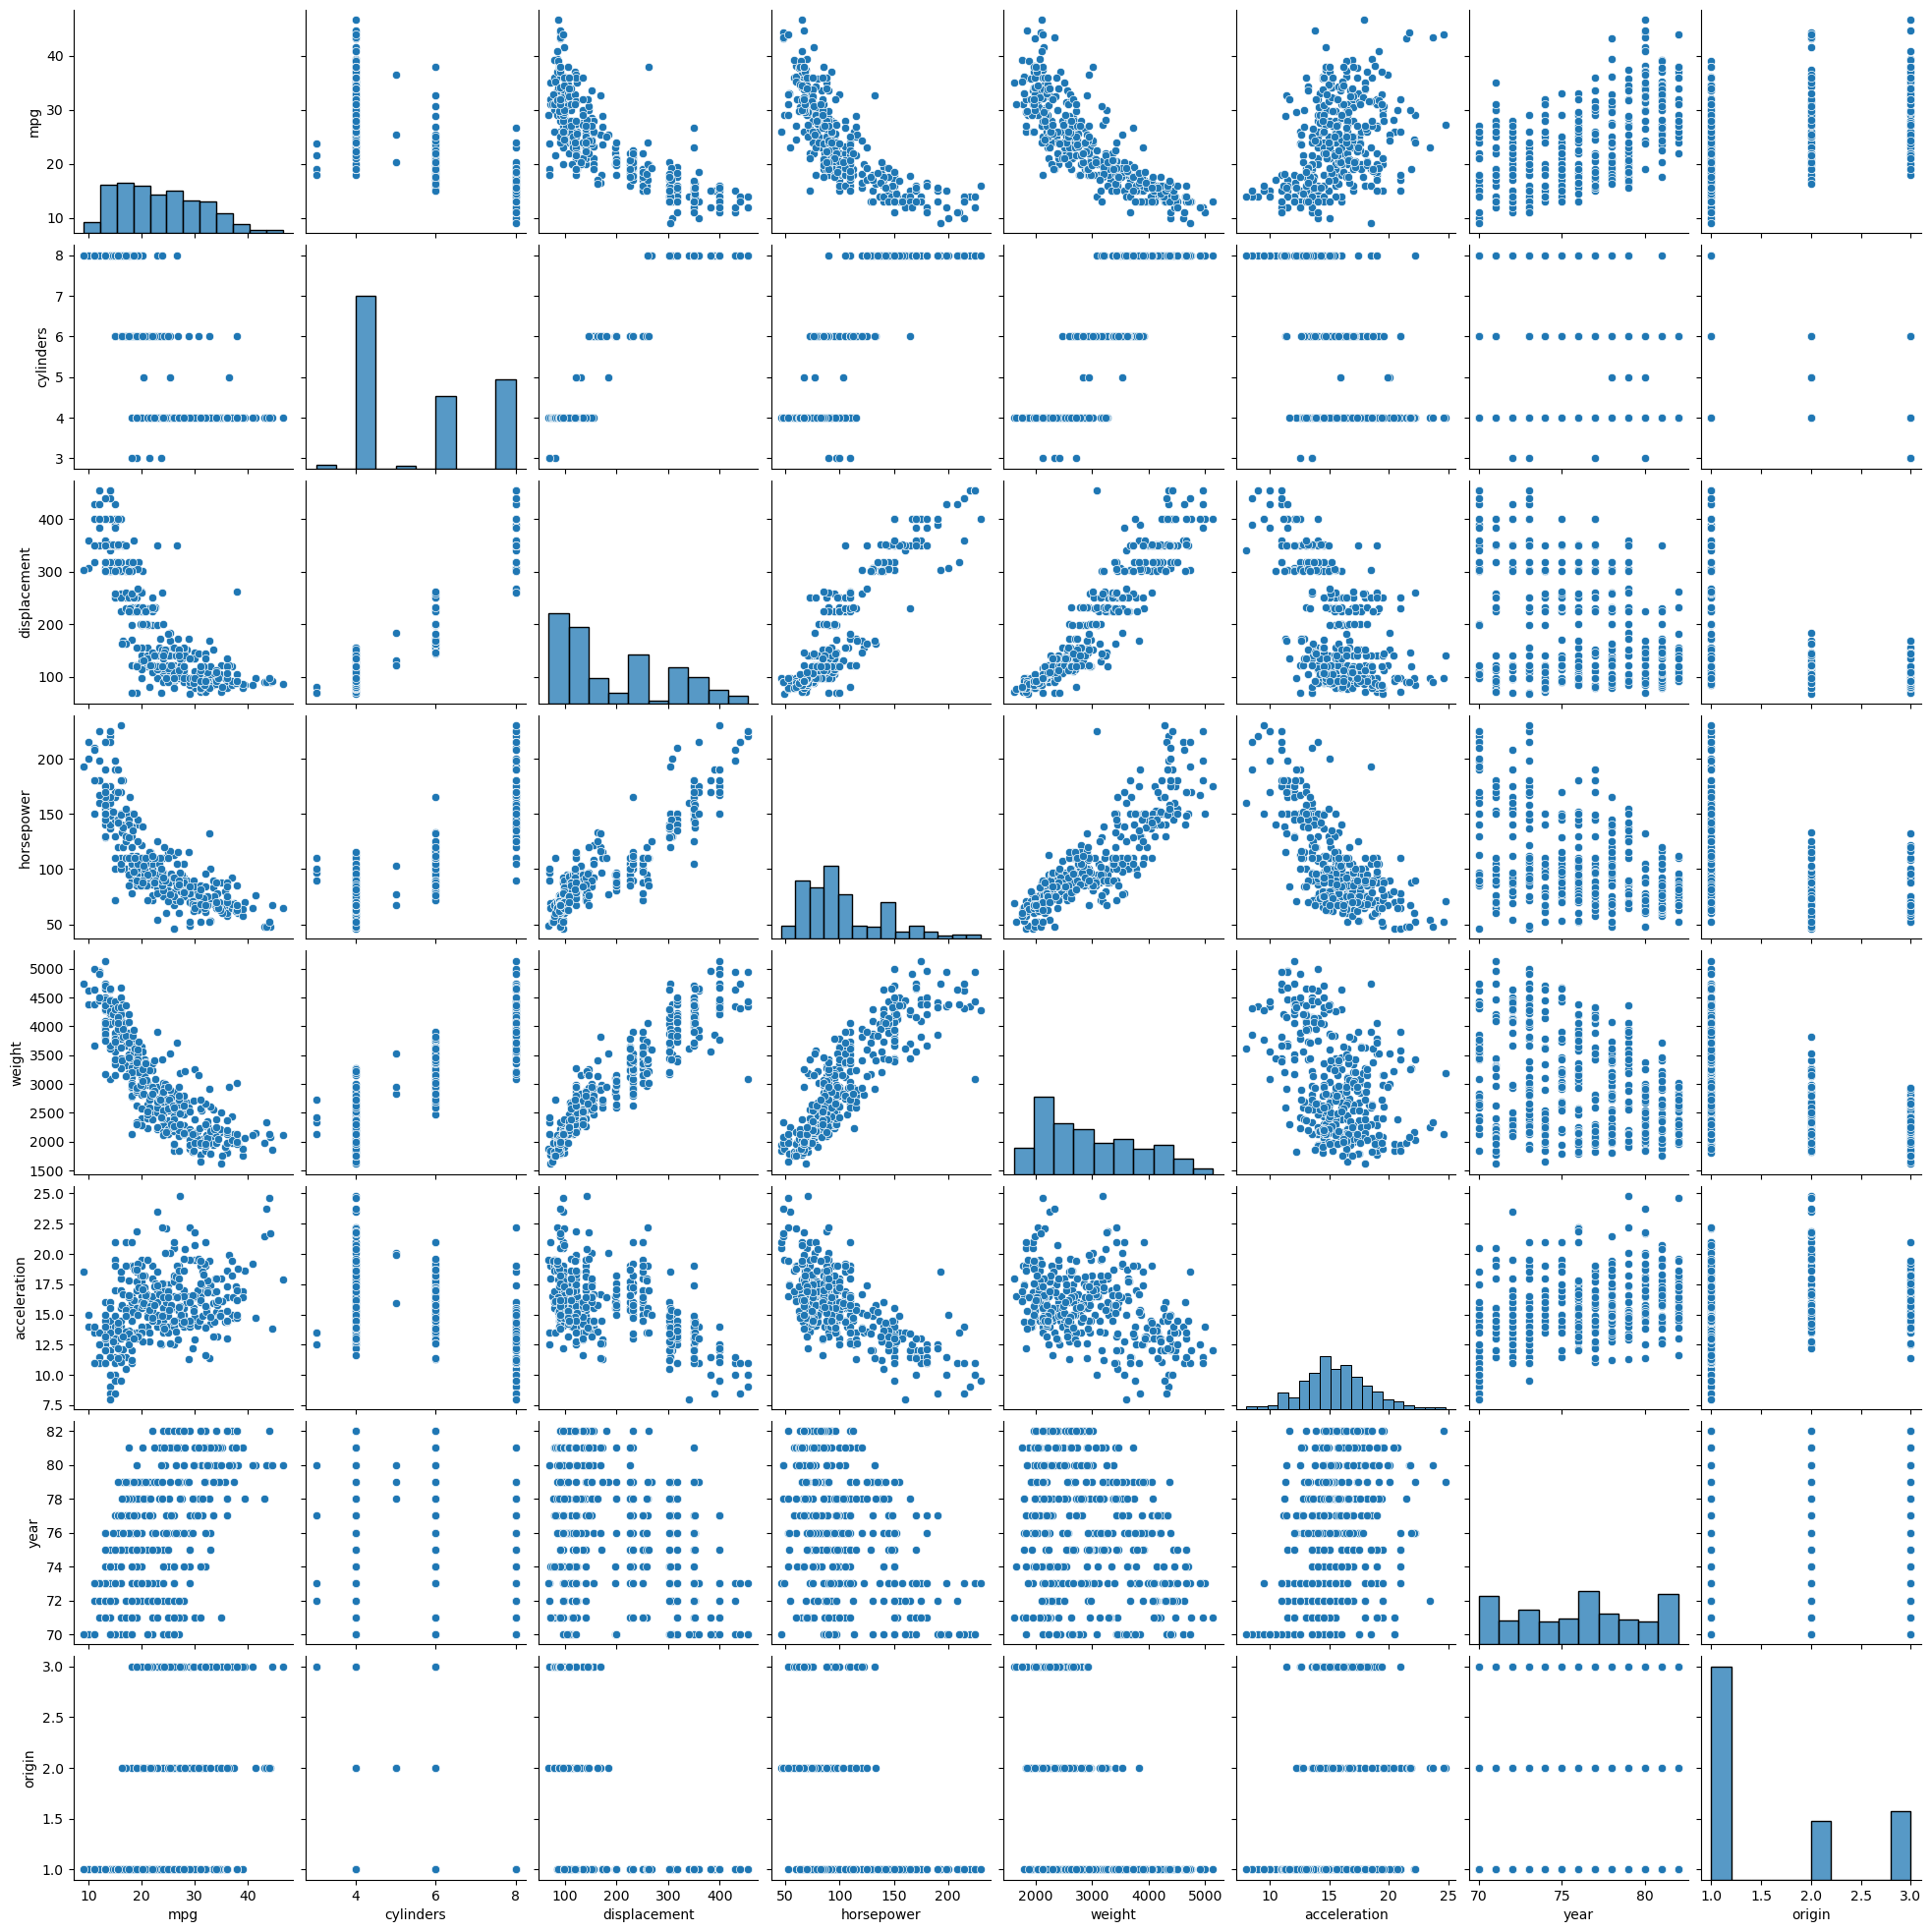

In [5]:
sns.pairplot(df)

Correlation between all numeric columns in the dataset

In [6]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


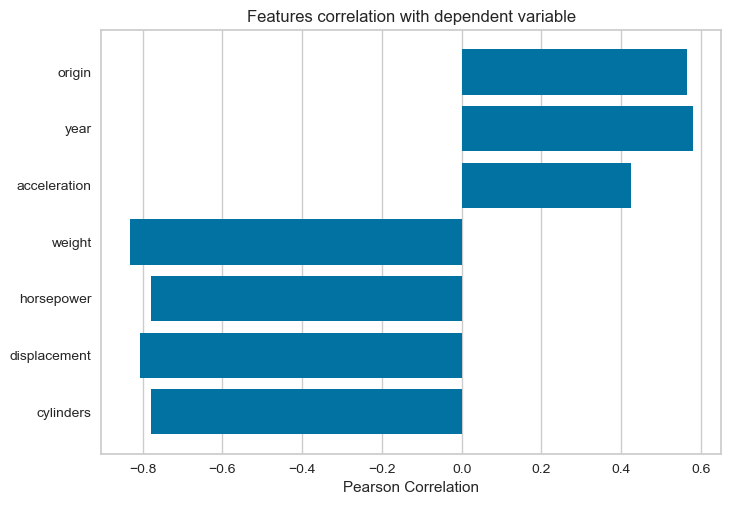

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [7]:
#!pip install yellowbrick
from yellowbrick.target import FeatureCorrelation

X= df.drop(['mpg'],axis=1)
y= df['mpg']
visualizer = FeatureCorrelation(labels= X.columns)
visualizer.fit(X,y)
visualizer.poof()

In [8]:
# Feature selection usinf variance inflation factor
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
scaler=StandardScaler()
scaler.fit(X)
X_scaled= scaler.transform(X)
vif['VIF Factor']= [variance_inflation_factor(X_scaled,i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif.round(2)

,VIF Factor,features
0,10.74,cylinders
1,21.84,displacement
2,9.94,horsepower
3,10.83,weight
4,2.63,acceleration
5,1.24,year
6,1.77,origin


Interpretation: We see there is some linear relationship between mpg & other numeric variables. Hence, we try to fit in a linear model. However, we see there is also a correlation among different columns like weight & displacement. Going by the principle of Correlation is not causation, we need to control for co-linearity.vif >5 for a scaled data suggests high colinearity/highly corelated, you should consider dropping those features..drop displacement & weight.. 

### Fitting a MLR model to predict mpg on all numeric variables 

In [9]:
# Creating X with all numeric columns and Y as mpg column
X= df.drop(['mpg'],axis=1)
y= df['mpg']

In [10]:
#Splitting the data-set into test & train dataset to evaluate the model performance 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression().fit(X_train,y_train)

In [12]:
#Printing the stats summary of our MLR model
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     171.5
Date:                Sun, 18 Feb 2024   Prob (F-statistic):           1.96e-92
Time:                        15:28:48   Log-Likelihood:                -689.32
No. Observations:                 262   AIC:                             1395.
Df Residuals:                     254   BIC:                             1423.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -15.6712      6.108     -2.566   

Interpretation: 
1. Our baseline for mpg is the constant -15.6712
2. With Pvalues <5%, we see weight, displacement**, year & origin are statistically significant as there is only less than 5% chances that the relationship is due to randonmess, so we reject the null hypothesis that there is no significant relationship. Since weight & displacement are highly corelated, if we control for weight, displacement is border-line statsitically significant. We can create a model keeping only weight, year & origin as feature selection based on statistical significance.
3. R2 is 83%, which means our model is able to explain 83% of the variance in my data. 

### Evaluating the linear fit based on the residual plot. 

For linear model, we say our error follows a normal distribution, which means mean(error)=0 and there is no correlation between the error & the fitted values. If we plot the error & fitted Y predicted values, there should not be a pattern or corelation. 

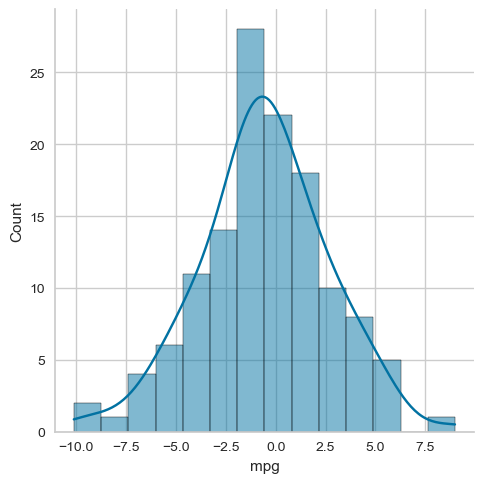

In [13]:
Y_test_pred= lm.predict(X_test)
Y_test_residual = y_test - Y_test_pred
sns.displot(Y_test_residual,kde= True)

Interpretation: our residual error follows a normal distribution with 0 mean

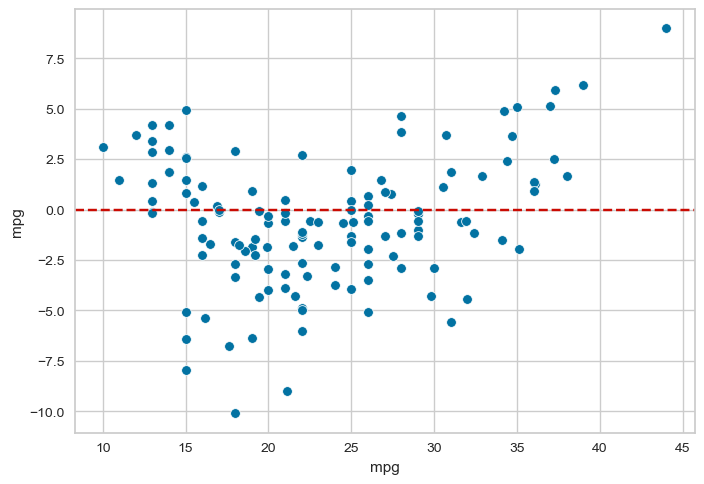

In [14]:
sns.scatterplot(x=y_test,y=Y_test_residual)
y_test.corr(Y_test_residual)
plt.axhline(y=0, color='r', linestyle='--')

Interpretation: We see a curved pattern and there is some correlation between Y_test & residual error. Hence Linear model may not be a good fit. 

### Calculating the RMSE of the model

In [15]:
#Evaluating the accuracy of our model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

mse_scores = cross_val_score(lm, X_train, y_train, scoring='neg_mean_squared_error', cv=5)

# cross-validated MSE scores for training data
print("Cross-validated MSE for training scores (Linear regression):", -mse_scores)

MSE=mean_squared_error(y_test,Y_test_pred)
RMSE=np.sqrt(MSE)
print("RMSE for test scores (Linear regression):", RMSE)


Cross-validated MSE for training scores (Linear regression): [11.16142439 16.56384103 14.69592799  9.32245077 10.27744403]
RMSE for test scores (Linear regression): 3.2418403035673053


### MLR using Ridge regression to reduce variance in the data by adding a penalty term.

In [16]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a range of alpha values
alphas = 10**np.linspace(10, -6, 100)

# Ridge regression
ridge_cv_model = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
ridge_cv_model.fit(X_train_scaled, y_train)
best_alpha_ridge = ridge_cv_model.alpha_
mse_scores_ridge = cross_val_score(ridge_cv_model, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5)

print("Cross-validated MSE scores (Ridge):", -mse_scores_ridge)
test_predictions = ridge_cv_model.predict(X_test_scaled)
MSE_ridge = mean_squared_error(y_test,test_predictions)
print(f'Ridge Regression test MSE is {np.sqrt(MSE_ridge)}')

Cross-validated MSE scores (Ridge): [11.14164213 16.91251917 14.46927195  9.26271361 10.14050579]
Ridge Regression test MSE is 3.2561463552158245


Not much improvement in RMSE Ridge

### Improving our model: Trying a new model based on feature selection 

In [20]:
# Creating X with statistically significant features based on our previous model - weight, year & origin and Y as mpg column
X= df[['weight','year','origin']]
y= df['mpg']

In [21]:
#Splitting the data-set into test & train dataset to evaluate the model performance 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
lm = LinearRegression().fit(X_train,y_train)

In [22]:
#Printing the stats summary of our MLR model
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     388.9
Date:                Sun, 18 Feb 2024   Prob (F-statistic):           2.14e-95
Time:                        15:46:36   Log-Likelihood:                -694.08
No. Observations:                 262   AIC:                             1396.
Df Residuals:                     258   BIC:                             1410.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -18.8257      5.277     -3.567      0.0

In [23]:
Y_test_pred=lm.predict(X_test)
MAE=mean_squared_error(y_test,Y_test_pred)
RMSE=np.sqrt(MAE)
RMSE

3.1985691330474997

Residual plot

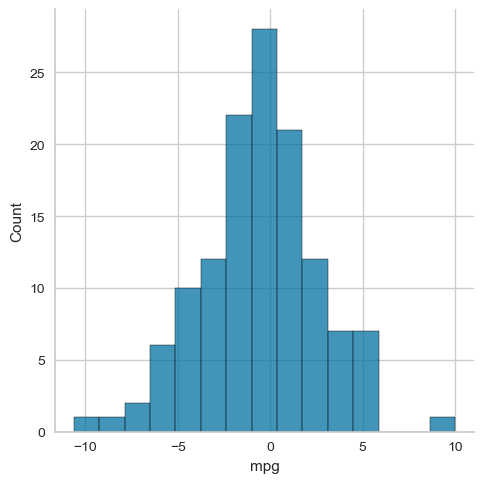

In [24]:
Y_test_residual=y_test - Y_test_pred
sns.displot(Y_test_residual)

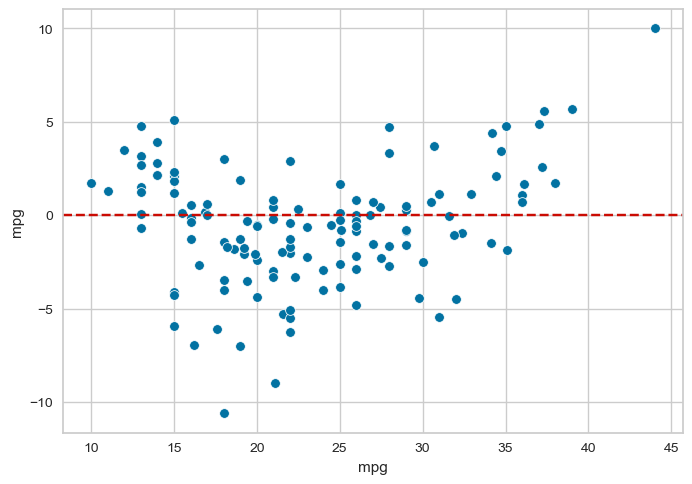

In [25]:
sns.scatterplot(x=y_test,y=Y_test_residual)
plt.axhline(y=0, color='r', linestyle='--')

Interpretation:
1. We are able to explain 82% of the variance in our model with just 3 features. We have reduced the complixity of our model using feature selection without affecting R2. Our RMSE is slightly reduced. So, this model is simpler than previous model with same RMSE
    

### Let's try to different interation terms/ polynomial model  to further reduce the RMSE

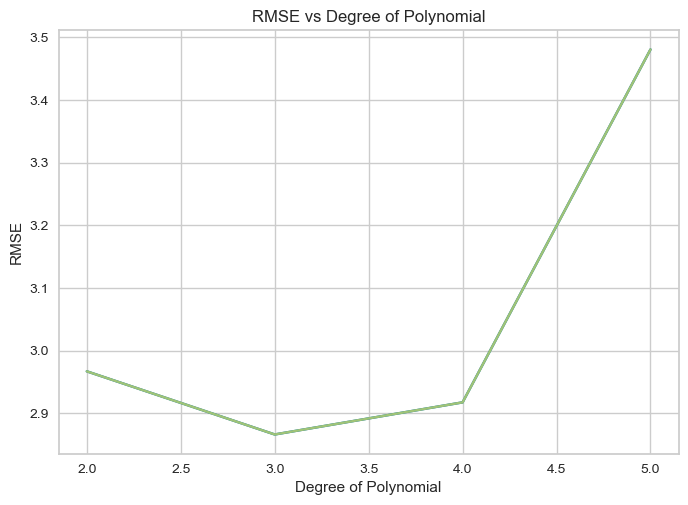

In [47]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

RMSE=[]

for i in range(2,6):
    polynomial_converter = PolynomialFeatures(degree=i,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.33, random_state=42)
    lm = LinearRegression().fit(X_train,y_train)
    Y_test_pred=lm.predict(X_test)
    MSE=mean_squared_error(y_test,Y_test_pred)
    RMSE.append(np.sqrt(MSE))
RMSE
sns.lineplot(x=range(2,6),y=RMSE)
sns.lineplot(x=range(2, 6), y=RMSE)
plt.xlabel('Degree of Polynomial')
plt.ylabel('RMSE')
plt.title('RMSE vs Degree of Polynomial')
plt.show()

In [48]:
polynomial_converter = PolynomialFeatures(degree=3,include_bias=False)
poly_features = polynomial_converter.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.33, random_state=42)
lm = LinearRegression().fit(X_train,y_train)
Y_test_pred=lm.predict(X_test)
MSE=mean_squared_error(y_test,Y_test_pred)
RMSE = np.sqrt(MSE)
RMSE

#### Only the interation term & not the squared terms
#polynomial_converter = PolynomialFeatures(interaction_only=True,include_bias = False)

2.8662877499577943

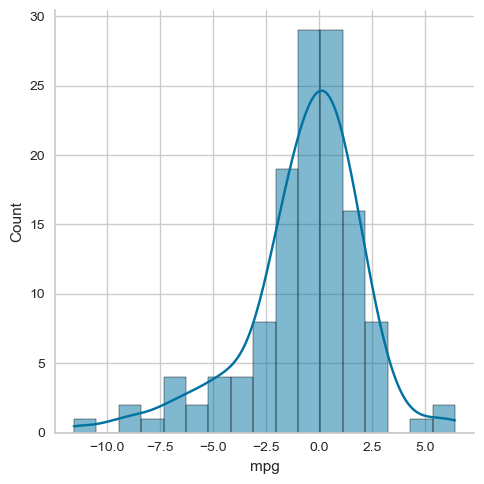

In [49]:
Y_test_residual=y_test - Y_test_pred
sns.displot(Y_test_residual, kde= True)

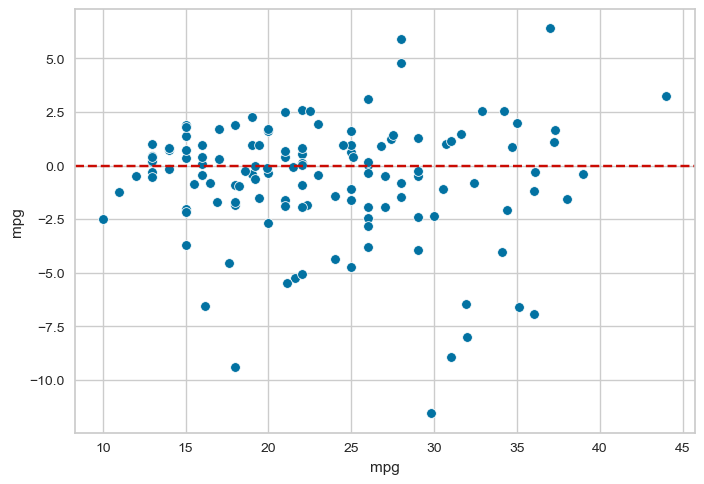

In [50]:
sns.scatterplot(x=y_test,y=Y_test_residual)
y_test.corr(Y_test_residual)
plt.axhline(y=0, color='r', linestyle='--')

Interpretation: RMSE is reduced to 2.7. This model satisfies the Linear model assumption. Residual mean is 0 & there is no pattern obsered. Variance should be constant, However we see a smaller variance in the left & it gets wider with higher values of mpg, there might be heteroscedasticity. We can try to use other non-linear tranformations like log 

### Trying different non-linear transformation on data using log & polynomial terms

In [79]:
import statsmodels.formula.api as smf
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
df1 = pd.concat([X_train, y_train], axis=1)
res1 = smf.ols(formula='mpg ~  np.log(weight)+ np.power(year, 2)+ np.power(origin, 2) + year*origin', data=df1).fit()
Y_test_pred=res1.predict(X_test)
MSE=mean_squared_error(y_test,Y_test_pred)
RMSE=np.sqrt(MSE)
RMSE

2.897820181692542

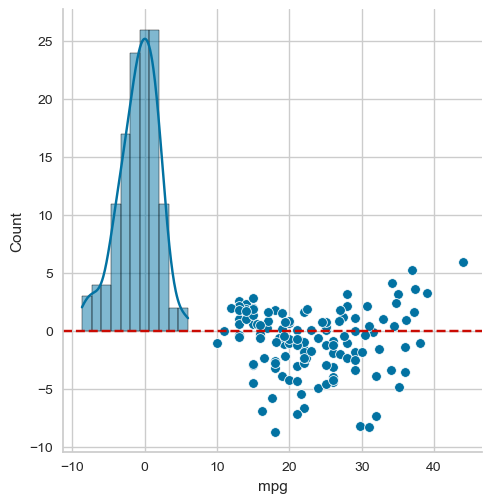

In [80]:
Y_test_residual=y_test - Y_test_pred
sns.displot(Y_test_residual, kde= True)
sns.scatterplot(x=y_test,y=Y_test_residual)
plt.axhline(y=0, color='r', linestyle='--')

In [81]:
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     268.5
Date:                Sun, 18 Feb 2024   Prob (F-statistic):          3.81e-107
Time:                        17:20:08   Log-Likelihood:                -657.20
No. Observations:                 262   AIC:                             1328.
Df Residuals:                     255   BIC:                             1353.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            7321.9096   1